In [0]:
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
from matplotlib import pyplot as plt

## 7.7
Assume the lifespan of a lightbulb can be modeled as a random variable $X$ with an exponential distribution of unknown parameter $\lambda$. Suppose that your data constists of observing 9 bulbs which lasted 2.1, 3.2, 4.4, 1.9, 3.5, 2.6, 3.1, 2.5, 2.4 months. Using prior of Gamma(3,6) for $\lambda$, find posterior p.d.f. for $\lambda$.

What is the probability $P(\lambda \leq 1/3)$?

$P(\lambda |D) \propto P(D|\lambda) P(\lambda) = (\prod_{i=1}^9 f_{X_\lambda}(D_i))Gamma(3,6)(\lambda)$ where $X_\lambda$ is an exponential distribution with the given $\lambda$.

$ =  \lambda^9e^{-\lambda \sum_{i=1}^9x_i} \times 6^3\lambda^2e^{-6\lambda} / \Gamma(3) = \lambda^{11} \times 216 / 2 \times e^{-\lambda (\sum x_i + 6)} $

In [0]:
data = [2.1, 3.2, 4.4, 1.9, 3.5, 2.6, 3.1, 2.5, 2.4]
sum(data)

25.700000000000003

$ = \lambda^{11} \times 216 / 2 \times e^{-\lambda (25.7 + 6)}  = 108 \lambda^{11}e^{-\lambda (31.7)}$

In [0]:
numerator = lambda x: 108 * x**11 * np.exp(-x * 31.7)

d = np.linspace(0,2,100)
plt.plot(d,numerator(d)) # A plot of the value of the numerator for various values of lambda
plt.show()


(4.186666134285572e-09, 4.457008998229409e-09)

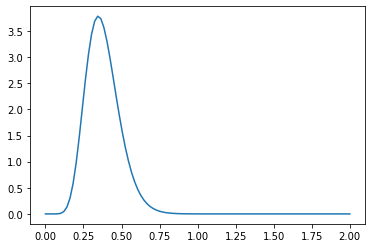

(0.9999999941348525, 9.286283282274724e-11)

In [0]:
denominator = integrate.quad(numerator, 0, np.inf)[0]

full = lambda x : numerator(x) / denominator

plt.plot(d,full(d)) # A plot of the normalized pdf
plt.show()

integrate.quad(full,0, np.inf) # Should spit out a number close to 1

In [0]:
integrate.quad(full,0,1/3)

(0.3691524976866623, 6.528844740540397e-10)

The probabilty $P(\lambda \leq 1/3)$ is approximately 0.369


## 7.8

Assume Poisson likelihood of $f(x) = \lambda^xe^\lambda / x!$


i.) Compute Fischer Information.

$-\mathbb{E}[D^2_\lambda \log f(X | \lambda)] 
= -\mathbb{E}[\frac{\partial^2}{\partial \lambda^2} \log (\lambda^xe^\lambda / x!)] 
= -\mathbb{E}[\frac{\partial^2}{\partial \lambda^2} x\log(\lambda) - \lambda - \log(x!)]
= -\mathbb{E}[\frac{\partial}{\partial \lambda} (x/\lambda - 1) ]
= -\mathbb{E}[-x/\lambda^2 ]
= \mathbb{E}[x/\lambda^2 ]
= \mathbb{E}[x]/\lambda^2
= \lambda/\lambda^2 = 1/\lambda
$

ii.) Compute Jeffreys prior. Is this prior proper or improper?

Jeffreys prior is proportional to $\sqrt{det(1/\lambda)} = \sqrt{1/\lambda} = 1/\sqrt{\lambda}$

Since the integral from 0 to inifinity is divergent, this is an improper prior.

iii.) Given data and using Jeffreys prior, what is the posterior distribution $P(\lambda | D)$?

Using Jeffreys prior allows us to say $P(\lambda | D) = \frac{P(D|\lambda)P(\lambda)}{\int_0^{\infty}P(D|\lambda')P(\lambda')d\lambda'}
= \frac{f_{X_\lambda}(D)(1/\sqrt{\lambda})}{\int_0^{\infty}f_{X_{\lambda'}}(D)(1/\sqrt{\lambda'})d\lambda'}
= \frac{\lambda^xe^\lambda / x!(1/\sqrt{\lambda})}{\int_0^{\infty} \lambda'^xe^{\lambda'} / x!(1/\sqrt{\lambda'})d\lambda'}
= \frac{\lambda^xe^\lambda(1/\sqrt{\lambda})}{\int_0^{\infty} \lambda'^xe^{\lambda'}(1/\sqrt{\lambda'})d\lambda'}
$

iv.) Is the uniform prior for $\lambda$ proper or improper?

Since a non-zero valued uniform distribution on an infinite set (in this case the positive reals) does not exist, this is an improper prior.

v.) Using the uniform prior on $\lambda$, $P(\lambda | D) 
= \frac{P(D|\lambda)P(\lambda)}{\int_0^{\infty}P(D|\lambda')P(\lambda')d\lambda'}
= \frac{f_{X_\lambda}(D)c}{\int_0^{\infty}f_{X_{\lambda'}}(D)c \ d\lambda'} 
= \frac{f_{X_\lambda}(D)}{\int_0^{\infty}f_{X_{\lambda'}}(D)d\lambda'} $

##7.9

You have a large collection of parts and wish to measure the quality of the shipment. You randomly select 10 parts to check for defective parts.

i.) What is a good choice of likelihood $P(X|\theta)$ to model this type of situation?

I would choose a Bernoulli distribution where $P(X = \text{Defective} | \theta) = \theta $. In this case, $\theta$ describes the underlying probability of any given part being defective.

ii.) Historically, the proportion of defective parts has been around 1% and has rarely been above 2%. What would be a reasonable prior distribution for the proportion $\theta$ of defective items, given this information?

Since the Beta distribution is the conjugate prior for our Bernoulli distribution, we can choose a Beta distribution with mean 0.01. 

mean $= \frac{\alpha}{\alpha + \beta} = 0.01$

Let's choose a some values for $\alpha$ and $\beta$ which satisfies the above relation, namely $\alpha = 1, \beta = 99$


mean 0.01
variance 9.801980198019803e-05


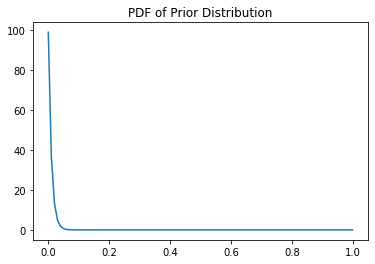

In [65]:
mean = lambda a,b : a / (a+b)
variance = lambda a,b : a * b / (a+b)**2 / (a + b + 1)

print("mean", mean(1,99))
print('variance', variance(1,99))

d = np.linspace(0,1,100)
plt.plot(d, stats.beta.pdf(d,1,99))
plt.title("PDF of Prior Distribution")
plt.show()

That certainly satisfies, so our prior distribution would be Beta(1,99)

iii.) Given 10 randomly selected parts, find the posterior disribution of $\theta$

$P(\theta|D) \propto \theta^x(1-\theta)^{10-x} Beta(1,99)(\theta)$ for $x = $ number of defective parts in the sample

iv.) Assume you find no defective parts.


>  a.) What would the posterior distribution be?
>
>  $P(\theta|D) = \frac{(1-\theta)^{10} X(\theta)}{\int_0^1(1-\theta')^{10}X(\theta')d\theta'}$
>  Where $X \sim Beta(1,99)$


>  b.) What would its mean be?
>
>  $\frac{(1-\theta)^{10} X(\theta)}{\int_0^1(1-\theta')^{10}X(\theta')d\theta'} 
= \frac{(1-\theta)^{10} X(\theta)}{\int_0^1(1-\theta')^{10}X(\theta')d\theta'}$



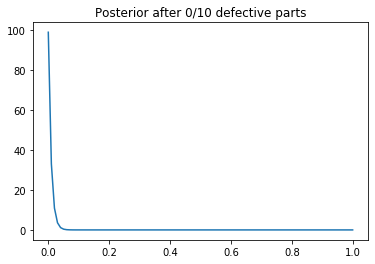

In [68]:
d = np.linspace(0,1,100)
plt.plot(d, (1-d)**10 * stats.beta.pdf(d,1,99))
plt.title("Posterior after 0/10 defective parts")
plt.show()

> We see the mean is a value between 0 and .01, exclusive. The mean has shifted toward zero, but is not zero.

> c.) What is the MLE for $\theta$?

The MLE $ = 1/10 \sum_{i=1}^{10} x_i = 0$

> iv.) Which would you prefer, MLE or Bayes Estimator?

I would much rather use the Bayes Estimator, since I know intuitively that there is a non-zero probability of a part being defective even if the ones I've seen so far have been perfect.

##7.10

Consider a multinomial likelihood

i.) Prove the Dirichlet distribution is a conjugate prior

Multinomial pmf: $\frac{n!}{x_1!...x_k!}p_1^{x_1}...p_k^{x_k}$

Dirichlet pdf: $\frac{1}{B(\alpha)}\prod_{i=1}^k p_i^{\alpha_i - 1}$

Then we see that $P(\mathbf{p}|\mathbf{x}) 
= M \frac{n!}{x_1!...x_k!}p_1^{x_1}...p_k^{x_k} \frac{1}{B(\alpha)}\prod_{i=1}^k p_i^{\alpha_i - 1} $

$ = M' \frac{n!}{x_1!...x_k!}p_1^{x_1 + a_1 - 1}...p_k^{x_k + a_k - 1}$,

Which we notice is in the same form as the pmf of the Multinomial distribution multiplied by a constant $M'$, which is the scalar multiplier which causes the pmf to sum to 1. Therefore we see that the Dirichlet distribtution is the conjugate prior to the Multinomial distribution.

ii.) Compute the Fischer information for the Multinomial Distribution

$-\mathbb{E}[D^2_\mathbf{p}\log f(X|\mathbf{p})]
= -\mathbb{E}[D^2_\mathbf{p} \log \frac{n!}{x_1!...x_k!}p_1^{x_1}...p_k^{x_k}] 
= -\mathbb{E}[D^2_\mathbf{p} [\log(n!) - \sum \log(x_i!) + \sum x_i\log(p_i)] \ ] $

$ = -\mathbb{E}[D_\mathbf{p} [x_i / p_i]]$
$= \mathbb{E}[
  \begin{bmatrix} 
  x_1/p_1^2 & 0 & \dots & 0 \\ 
  0 & x_2/p_2^2 & \dots & 0 \\ 
  \vdots & \vdots &\ddots & \vdots \\ 
  0 & 0 & \dots & x_k/p_k^2
  \end{bmatrix} 
  ] 
$
$
  =\begin{bmatrix} 
  1/p_1 & 0 & \dots & 0 \\ 
  0 & 1/p_2 & \dots & 0 \\ 
  \vdots & \vdots &\ddots & \vdots \\ 
  0 & 0 & \dots & 1/p_k
  \end{bmatrix}
  $

iii.) Compute the Jeffreys Prior

$f(\mathbf{p}) \propto \sqrt{\det I(\mathbf{p})} = \frac{1}{\sqrt{p_1...p_k}}$

## 7.11


i.) Show that Bernoulli distribution is a member of the exponential class with 

$
h(x) = 1
$

$
g(\eta(\theta))= 1 - \theta
$

$
T(x) = x
$

$
\eta = \log(\theta/(1-\theta))
$


Bernoulli pmf: $ \theta^x (1 - \theta)^{1-x}  = g(\eta(\theta)) \frac{\theta}{1-\theta}^x = (1) g(\eta(\theta)) e^{x\log(\frac{\theta}{1-\theta})} = h(x)g(\eta(\theta))e^{\eta(\theta)^T T(x)} $

ii.) Show that multivariate normals belong with

$h(x) = (2\pi)^{d/2}$

$g(\eta(\theta)) = \frac{1}{\sqrt{\det(\Sigma)} e^{1/2 \eta^T\Sigma^{-1}\mu}}$

$T(x) = \begin{bmatrix} x \\ x \end{bmatrix} $

$ \eta = \begin{bmatrix} \Sigma^{-1}\mu \\ -\frac{1}{2} \Sigma^{-1}x \end{bmatrix} $

Multivariate Normal pdf:

$ (2\pi)^{-\frac{d}{2}}\det(\Sigma)^{-\frac{1}{2}}e^{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)} $

$
= h(x)\det(\Sigma)^{-\frac{1}{2}}e^{-\frac{1}{2}x^T\Sigma^{-1}x + x^T\Sigma^{-1}\mu-\frac{1}{2}\mu^T\Sigma^{-1}\mu} $

$ 
= h(x) g(\eta(\theta)) e^{\eta(\theta)^TT(x)}
$

iii.) Show that the prior $p(\eta|\zeta,\nu) \propto g(\eta)^\nu e^{\eta^T\zeta} $  is conjugate to the likelihood with posterior $ p(\eta|D,\zeta,\nu) = p(\eta|\zeta + \sum T(x_i), \nu + n)$



$\text{posterior} \propto \text{likelihood} * \text{prior} 
= h(x) g(\eta) e^{\eta(\theta)^TT(x)} * g(\eta)^\nu e^{\nu^T\zeta} 
= h(x) g(\eta)^{\nu + 1} e^{\eta(\theta)^TT(x) + \nu^T\zeta}$
for a single bayesian update.

The result after n updates is then 
$ = h(x) g(\eta)^{\nu + 1 + ... + 1} e^{\eta(\theta)^TT(x_1) + ... + \eta(\theta)^TT(x_n) + \nu^T\zeta}
= h(x) g(\eta)^{\nu + n} e^{\eta(\theta)^T\sum T(x_i) + \nu^T\zeta} = p(\eta|\zeta + \sum T(x_i), \nu + n)$

